In [ ]:
pip install pandas


In [ ]:
pip install matplotlib


In [ ]:
pip install numpy

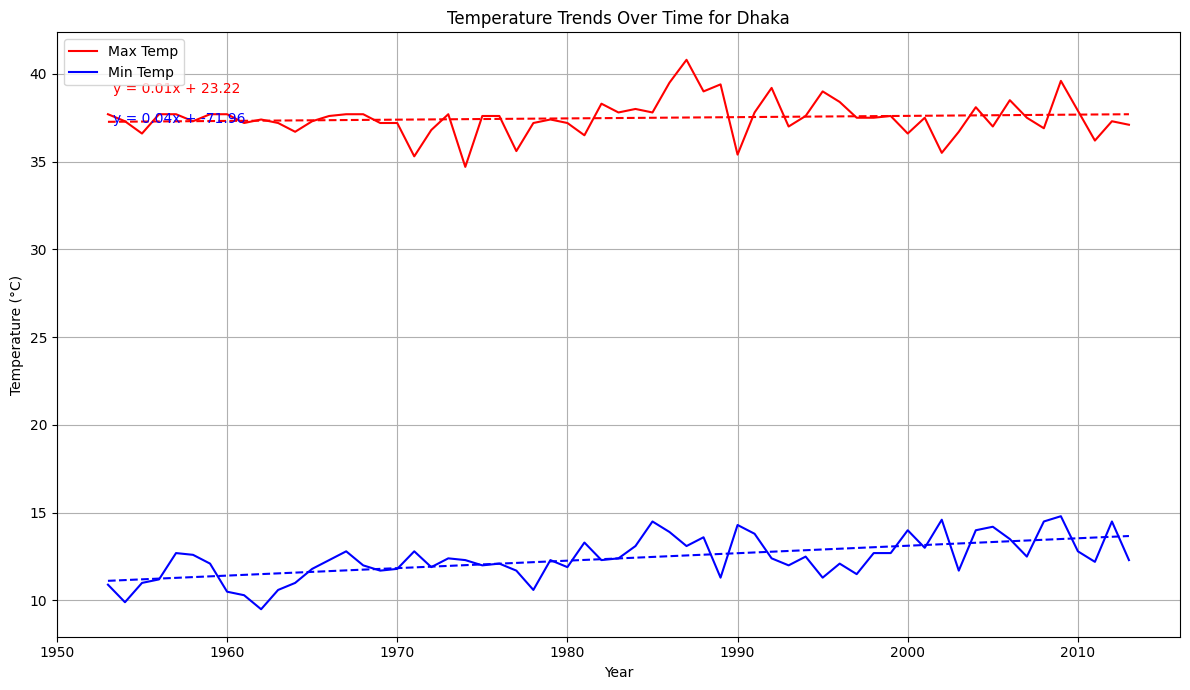

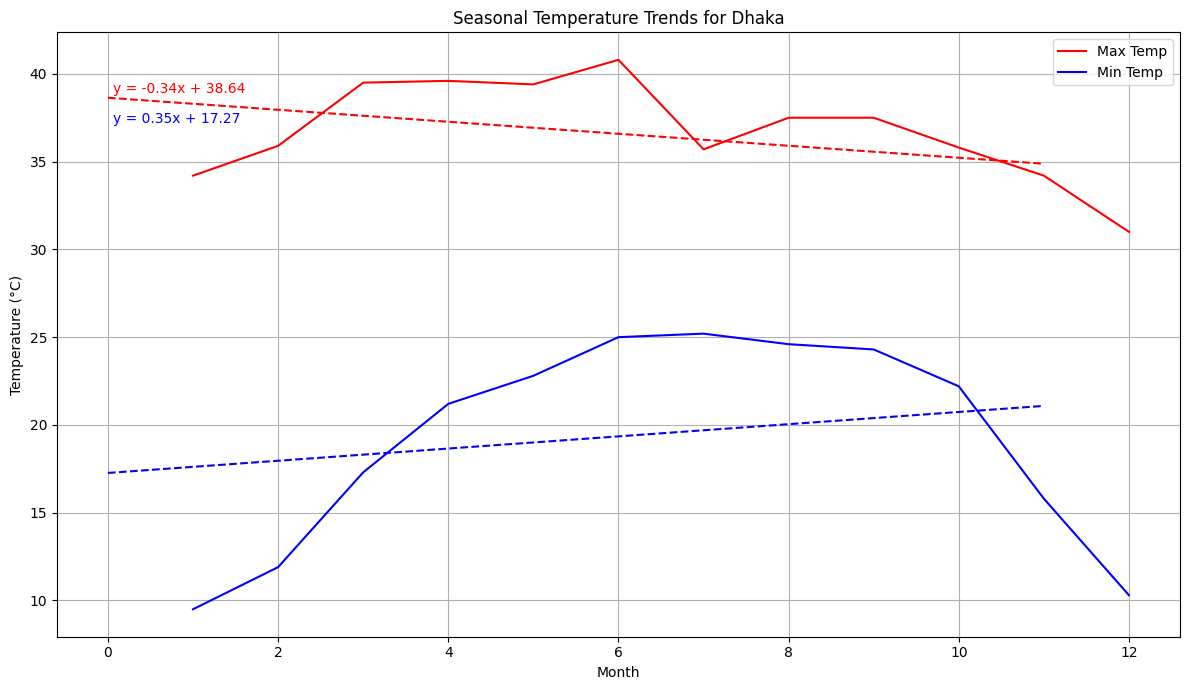

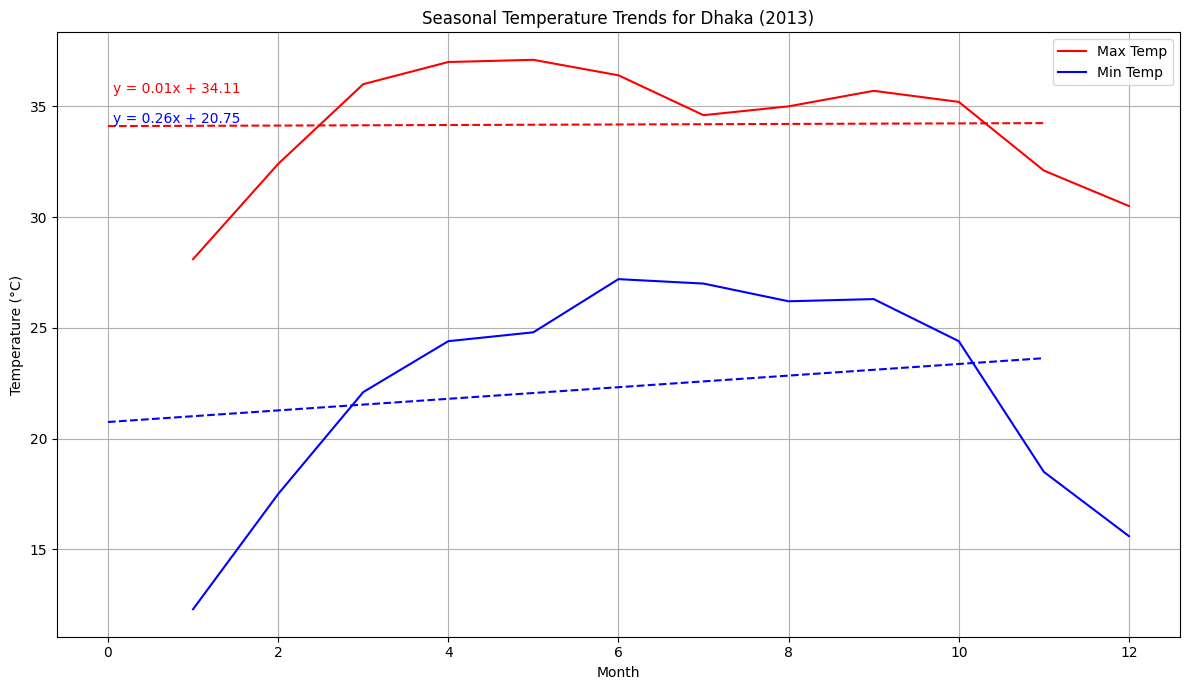

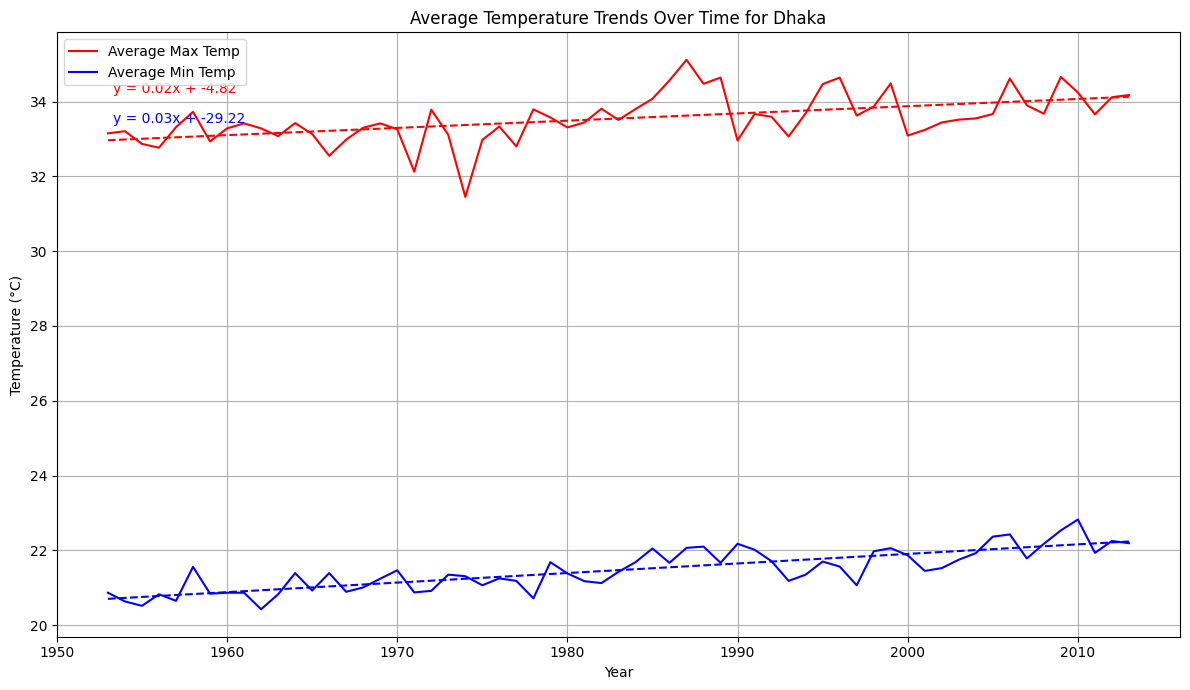

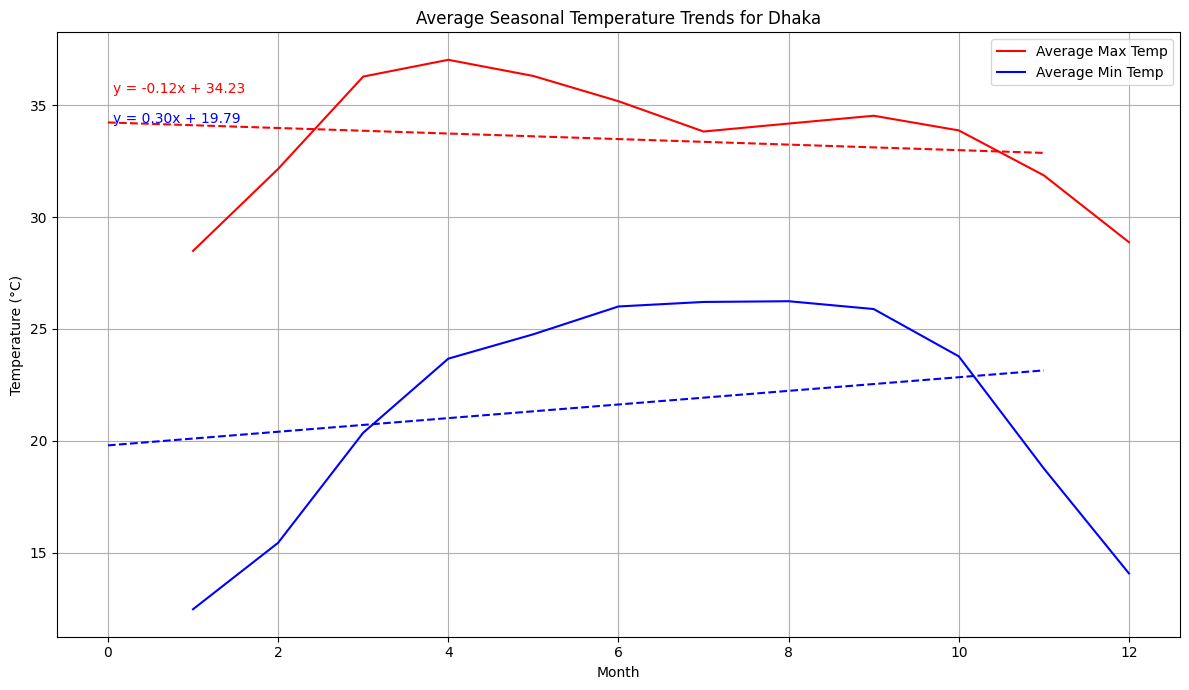

Hottest temperature range in Dhaka: 9.5˚C – 40.8˚C
Coldest temperature range in Dhaka: 9.5˚C – 25.2˚C
Average hottest temperature range in Dhaka: 31.45˚C – 35.11666666666667˚C
Average coldest temperature range in Dhaka: 20.425˚C – 22.825˚C


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import “DATA.csv”
file_path = '/content/DATA.csv'
data = pd.read_csv(file_path)

# Data Rearrangement: Highest And Lowest Temp Recorded In Dhaka.
dhaka_data = data[data['Station Names'] == 'Dhaka']
pivot_max_temp = dhaka_data.pivot(index='YEAR', columns='Month', values='Max Temp')
pivot_min_temp = dhaka_data.pivot(index='YEAR', columns='Month', values='Min Temp')

# Define a function to plot regression line and display its equation
def plot_regression_line(x, y, color, label):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), color=color, linestyle='--')
    equation = f"y = {z[0]:.2f}x + {z[1]:.2f}"
    plt.annotate(equation, xy=(0.05, 0.9 - label*0.05), xycoords='axes fraction', color=color)

# Make Line chart.
plt.figure(figsize=(12, 7))
plt.plot(pivot_max_temp.index, pivot_max_temp.max(axis=1), label='Max Temp', color='red')
plt.plot(pivot_min_temp.index, pivot_min_temp.min(axis=1), label='Min Temp', color='blue')
plot_regression_line(pivot_max_temp.index, pivot_max_temp.max(axis=1), 'red', 0)
plot_regression_line(pivot_min_temp.index, pivot_min_temp.min(axis=1), 'blue', 1)
plt.title('Temperature Trends Over Time for Dhaka')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Seasonal Line Chart.
plt.figure(figsize=(12, 7))
plt.plot(pivot_max_temp.columns, pivot_max_temp.max(), label='Max Temp', color='red')
plt.plot(pivot_min_temp.columns, pivot_min_temp.min(), label='Min Temp', color='blue')
plot_regression_line(range(12), pivot_max_temp.max(), 'red', 0)
plot_regression_line(range(12), pivot_min_temp.min(), 'blue', 1)
plt.title('Seasonal Temperature Trends for Dhaka')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Seasonal Line Chart Of 2013.
data_2013 = dhaka_data[dhaka_data['YEAR'] == 2013]
plt.figure(figsize=(12, 7))
plt.plot(data_2013['Month'], data_2013['Max Temp'], label='Max Temp', color='red')
plt.plot(data_2013['Month'], data_2013['Min Temp'], label='Min Temp', color='blue')
plot_regression_line(range(12), data_2013['Max Temp'].values, 'red', 0)
plot_regression_line(range(12), data_2013['Min Temp'].values, 'blue', 1)
plt.title('Seasonal Temperature Trends for Dhaka (2013)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Data Rearrangement: Average Highest And Lowest Temp Recorded In Dhaka.
avg_max_temp = pivot_max_temp.mean(axis=1)
avg_min_temp = pivot_min_temp.mean(axis=1)

# Make Line chart for Average Temperatures.
plt.figure(figsize=(12, 7))
plt.plot(avg_max_temp.index, avg_max_temp, label='Average Max Temp', color='red')
plt.plot(avg_min_temp.index, avg_min_temp, label='Average Min Temp', color='blue')
plot_regression_line(avg_max_temp.index, avg_max_temp, 'red', 0)
plot_regression_line(avg_min_temp.index, avg_min_temp, 'blue', 1)
plt.title('Average Temperature Trends Over Time for Dhaka')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Seasonal Line Chart for Average Temperatures.
plt.figure(figsize=(12, 7))
plt.plot(pivot_max_temp.columns, pivot_max_temp.mean(), label='Average Max Temp', color='red')
plt.plot(pivot_min_temp.columns, pivot_min_temp.mean(), label='Average Min Temp', color='blue')
plot_regression_line(range(12), pivot_max_temp.mean(), 'red', 0)
plot_regression_line(range(12), pivot_min_temp.mean(), 'blue', 1)
plt.title('Average Seasonal Temperature Trends for Dhaka')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Results
print(f"Hottest temperature range in Dhaka: {pivot_min_temp.min().min()}˚C – {pivot_max_temp.max().max()}˚C")
print(f"Coldest temperature range in Dhaka: {pivot_min_temp.min().min()}˚C – {pivot_min_temp.min().max()}˚C")
print(f"Average hottest temperature range in Dhaka: {avg_max_temp.min()}˚C – {avg_max_temp.max()}˚C")
print(f"Average coldest temperature range in Dhaka: {avg_min_temp.min()}˚C – {avg_min_temp.max()}˚C")
